In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/csv/Final Project 1.csv')

In [6]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

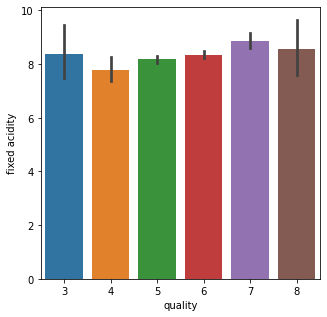

In [10]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = dataset)

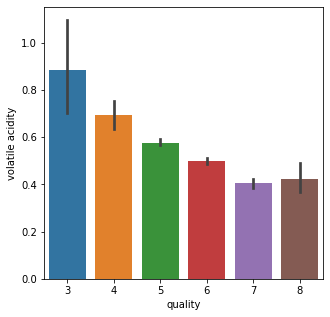

In [11]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataset)

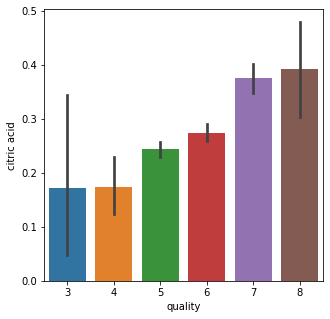

In [12]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = dataset) 

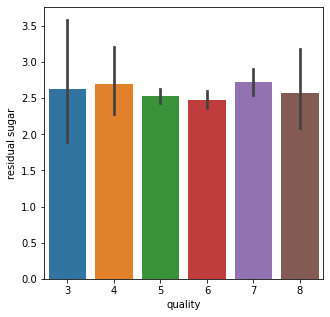

In [13]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = dataset)

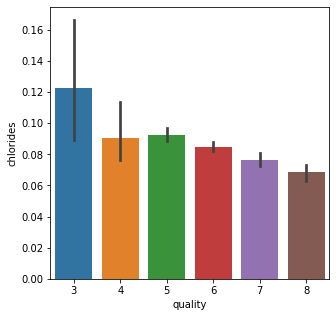

In [14]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'chlorides', data = dataset)

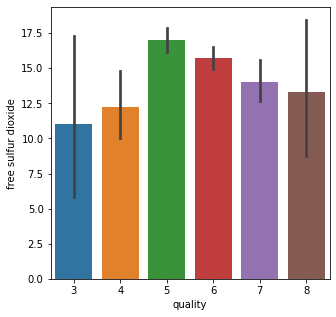

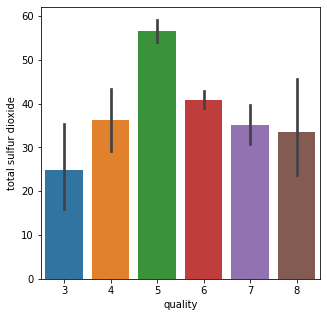

In [15]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataset)

fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataset)

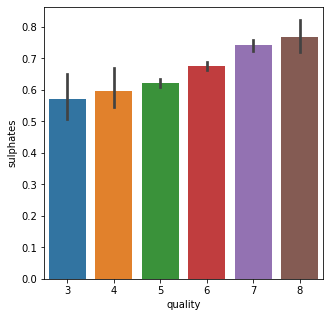

In [16]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'sulphates', data = dataset)

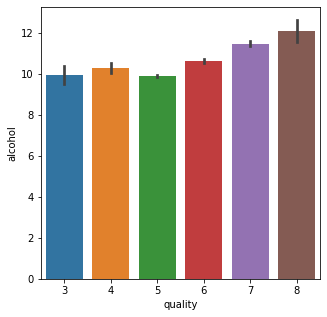

In [17]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'alcohol', data = dataset)

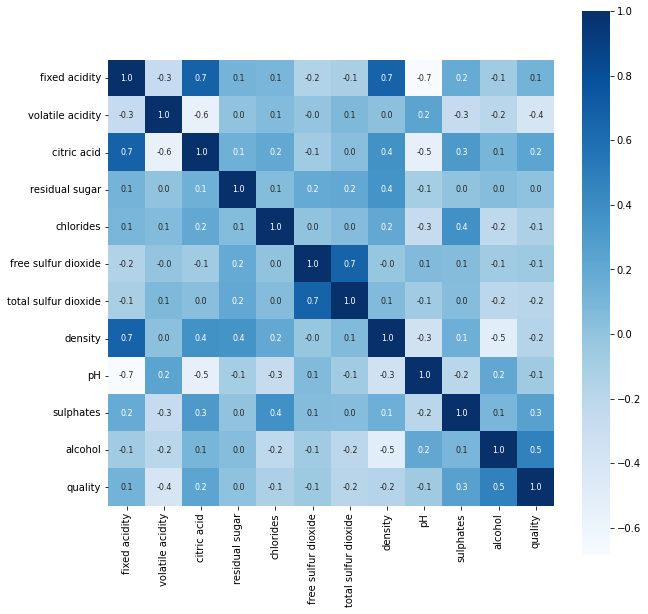

In [18]:
correlation = dataset.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square=True, fmt= '.1f', annot=True, annot_kws= {'size': 8}, cmap = 'Blues')

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [21]:
dataset['quality'].value_counts().sum()

1599

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


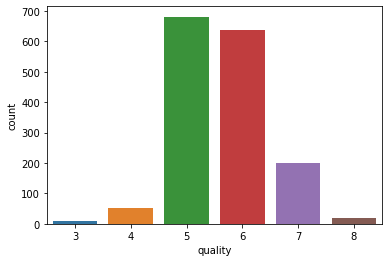

In [22]:
sns.countplot(dataset['quality'])

**Converting the values as 0(for bad) and 1(for good) based on the quality.**

In [23]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)

In [24]:
label_quality = LabelEncoder()

In [25]:
dataset['quality'] = label_quality.fit_transform(dataset['quality'])

In [26]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [27]:
x = dataset.drop('quality', axis = 1)
y = dataset['quality']

In [28]:
x.shape

(1599, 11)

In [29]:
y.shape

(1599,)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [31]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1279, 11) (1279,) (320, 11) (320,)


In [32]:
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

In [33]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
Y_pred_train = model.predict(X_train)
Y_pred_train_accuracy = accuracy_score(Y_train, Y_pred_train)
print("Acccuracy on training Data : ", Y_pred_train_accuracy)

Acccuracy on training Data :  0.8858483189992181


The model gives the accuracy of 88.58% when tested on the training data.

In [35]:
Y_pred_test = model.predict(X_test)
Y_pred_test_accuracy = accuracy_score(Y_test, Y_pred_test)
print("Acccuracy on testing Data : ", Y_pred_test_accuracy)

Acccuracy on testing Data :  0.865625


The model gives the accuracy of 86.568% when tested on the testing data.

In [36]:
input_data = x[5:6]
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
std_scaler = Scaler.transform(input_data_reshaped)
prediction = model.predict(std_scaler)
print(prediction)
if(prediction[0] == 0):
  print("bad")
else:
  print("good")


[0]
bad


In [37]:
print(y[5:6])

5    0
Name: quality, dtype: int64


## **Name : Akshat Mehra, Ansh Sood**